---
## Table of Content
---

## 0. About the data

## 1. Importing libraries and csv file

## 2.Exploratory Data Analysis (EDA)
* 2.1 A first look
* 2.2 Distribution of Number of Transactions with respect to time
* 2.3 Distribution of Value of Transactions with respect to time
* 2.4 Visual comparison of regular and fraudulent transactions in data sample
* 2.5 Visual Correlation (Heatmap)

## 3. Data preparation and ML models
* 3.1 Preparing the features with StandardScaler
* 3.2 Splitting the dataset into train and test data
* 3.3 Deal with the unbalanced dataset

## 1. Importing libraries and csv file
---
Importing necessary packages (libraries) and the .csv file.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

from imblearn.under_sampling import RandomUnderSampler

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline


In [33]:
#import dataset
file_path = "./sao-paulo-properties-april-2019.csv"
df = pd.read_csv(file_path)

## 2. Exploratory Data Analysis (EDA)
---
A first look at our data set.

In [34]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [35]:
# general statistics
print(df.describe(include=object))

               District Negotiation Type Property Type
count             13640            13640         13640
unique               96                2             1
top     Moema/São Paulo             rent     apartment
freq                293             7228         13640


In [36]:
df.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [59]:
df.corr()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
Price,1.000000,0.203857,0.378450,0.272267,0.341887,0.313267,0.337959,0.102495,-0.006385,0.131494,0.033812,-0.021678,-0.024897
Condo,0.203857,1.000000,0.761019,0.451355,0.543094,0.535896,0.632137,0.000779,0.101748,0.157123,-0.082479,-0.029288,-0.032258
Size,0.378450,0.761019,1.000000,0.663280,0.684416,0.675828,0.741757,0.012513,0.033325,0.130841,-0.046182,-0.035356,-0.038486
Rooms,0.272267,0.451355,0.663280,1.000000,0.554324,0.527250,0.589587,0.035810,-0.054274,0.161721,-0.010999,-0.049751,-0.051009
Toilets,0.341887,0.543094,0.684416,0.554324,1.000000,0.910445,0.694664,0.178360,0.078729,0.263564,-0.028709,-0.135492,-0.137089
Suites,0.313267,0.535896,0.675828,0.527250,0.910445,1.000000,0.704515,0.140794,0.072325,0.266896,-0.040307,-0.138138,-0.139654
Parking,0.337959,0.632137,0.741757,0.589587,0.694664,0.704515,1.000000,0.053850,0.080594,0.293948,-0.024046,-0.060613,-0.062953
Elevator,0.102495,0.000779,0.012513,0.035810,0.178360,0.140794,0.053850,1.000000,0.066680,0.204461,0.170077,-0.127179,-0.121063
Furnished,-0.006385,0.101748,0.033325,-0.054274,0.078729,0.072325,0.080594,0.066680,1.000000,0.146984,-0.045555,-0.018098,-0.016798
Swimming Pool,0.131494,0.157123,0.130841,0.161721,0.263564,0.266896,0.293948,0.204461,0.146984,1.000000,0.006989,-0.038082,-0.035105


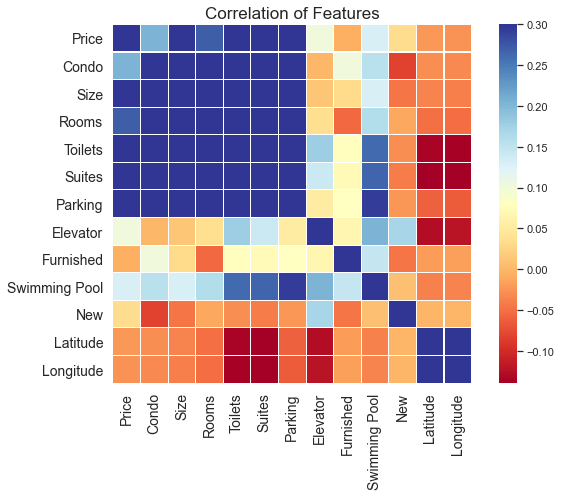

In [58]:
# correlations
corr = df.corr() # calculate correlation matrix
fig, ax = plt.subplots(figsize=(9, 7))
#mask = np.triu(np.ones_like(corr, dtype=bool)) # Hides right upper triangle on heatmap


sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            vmax=.3,
            square=True,
            linewidths=.1,
#            mask = mask,
            cmap="RdYlBu",
            ax=ax)

ax.set_title('Correlation of Features', fontsize=17)
ax.tick_params(axis='both', labelsize=14) # size of numbers on x- and y-axis

plt.tight_layout()
plt.savefig('graph4.png')

In [38]:
# check is there is null values
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [39]:
# remove accents to avoid errors
df["District"] = df["District"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/Sao Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/Sao Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/Sao Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/Sao Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/Sao Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/Sao Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/Sao Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/Sao Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/Sao Paulo,sale,apartment,-23.652060,-46.637046


<AxesSubplot:ylabel='Frequency'>

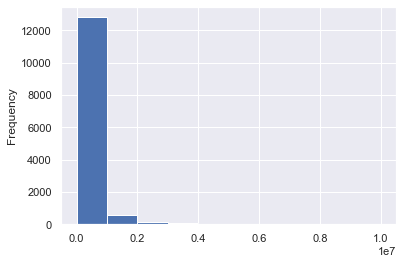

In [40]:
# Data Visualization: We need to check values distribution for each column
# we can divide it according to the \% Quartiles
df["Price"].plot.hist() 


<AxesSubplot:ylabel='Frequency'>

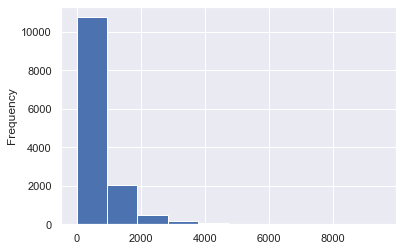

In [41]:
df["Condo"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

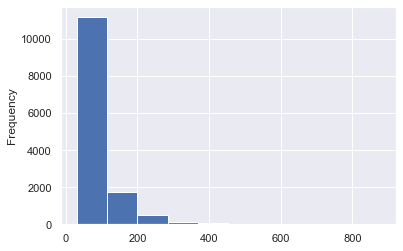

In [42]:
df["Size"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

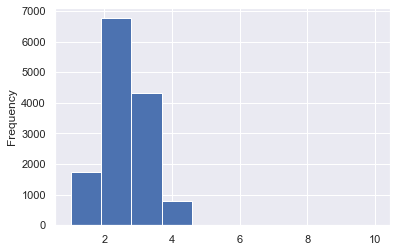

In [43]:
df["Rooms"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

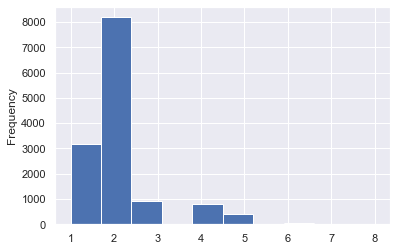

In [44]:
df["Toilets"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

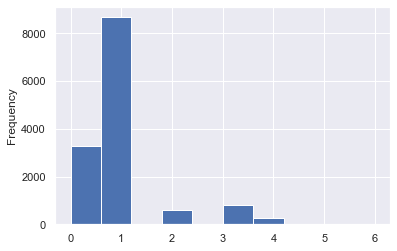

In [45]:
df["Suites"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

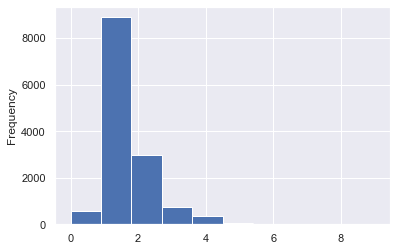

In [46]:
df["Parking"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

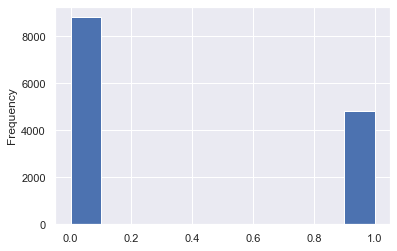

In [47]:
df["Elevator"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

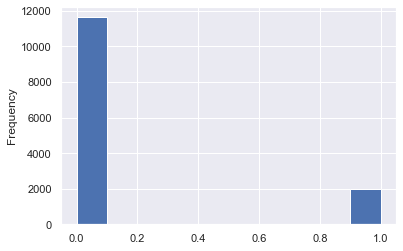

In [48]:
df["Furnished"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

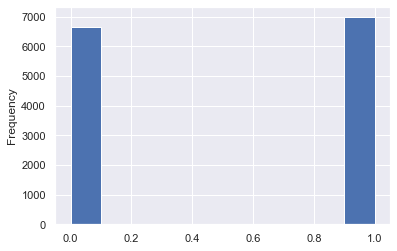

In [49]:
df["Swimming Pool"].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

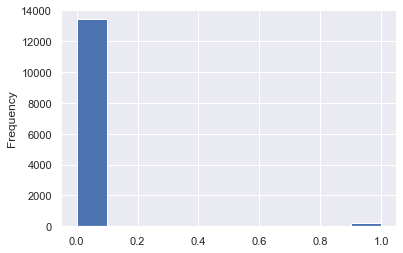

In [50]:
df["New"].plot.hist() 

<AxesSubplot:>

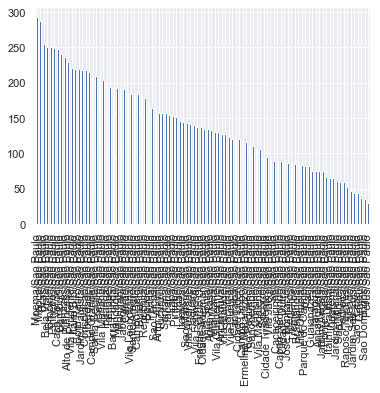

In [51]:
pd.value_counts(df["District"]).plot.bar() #check info above

<AxesSubplot:>

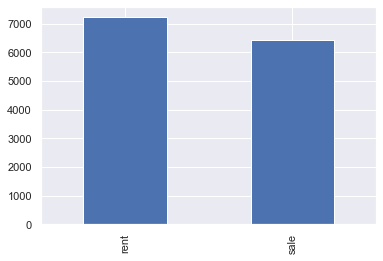

In [52]:
pd.value_counts(df["Negotiation Type"]).plot.bar()

<AxesSubplot:>

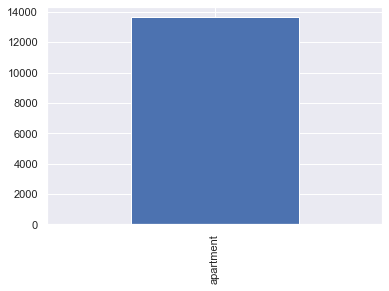

In [53]:
pd.value_counts(df["Property Type"]).plot.bar() # is redudant

In [54]:
# latitude and longitude
# read .shp file
# add points there
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

lat_max = df.loc[df['Latitude'] != 0].max()
lat_min = df.loc[df['Latitude'] != 0].min() 
lon_max = df.loc[df['Longitude'] != 0].max()
lon_min = df.loc[df['Longitude'] != 0].min()



In [55]:
# Data Visualization: Correlations on a graph

In [56]:
# After watching the Price distribution we create the labels for each price range

In [57]:
# Double Check distribution on price